<a href="https://colab.research.google.com/github/mohanrajmit/Image-Read/blob/master/Convolutions_Sidebar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
!git clone https://github.com/mohanrajmit/Image-Read.git

Cloning into 'Image-Read'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 3077 (delta 11), reused 0 (delta 0), pack-reused 3053
Receiving objects: 100% (3077/3077), 190.74 MiB | 36.69 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [16]:
img = cv2.imread("/content/1.png")

img = cv2.resize(img,(100,100))

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

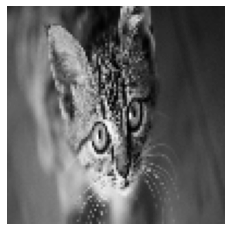

In [18]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.gray()
plt.imshow(gray)
plt.show()

In [19]:
i_transformed = np.copy(gray)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [20]:
print(size_x)
print(size_y)

100
100


In [28]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [29]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (gray[x - 1, y-1] * filter[0][0])
      convolution = convolution + (gray[x, y-1] * filter[0][1])
      convolution = convolution + (gray[x + 1, y-1] * filter[0][2])
      convolution = convolution + (gray[x-1, y] * filter[1][0])
      convolution = convolution + (gray[x, y] * filter[1][1])
      convolution = convolution + (gray[x+1, y] * filter[1][2])
      convolution = convolution + (gray[x-1, y+1] * filter[2][0])
      convolution = convolution + (gray[x, y+1] * filter[2][1])
      convolution = convolution + (gray[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      print(convolution)
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Streaming output truncated to the last 5000 lines.
-8.0
-1.0
-4.0
4.0
3.0
-3.0
2.0
2.0
0.0
17.0
-5.0
7.0
3.0
-7.0
-23.0
-8.0
-6.0
-13.0
22.0
24.0
-8.0
-17.0
18.0
49.0
96.0
-184.0
-17.0
101.0
31.0
29.0
177.0
-158.0
-107.0
115.0
-178.0
98.0
-52.0
61.0
88.0
-46.0
316.0
-317.0
-19.0
52.0
133.0
0.0
51.0
-351.0
284.0
-398.0
207.0
-162.0
246.0
-148.0
71.0
189.0
-60.0
50.0
125.0
22.0
-191.0
182.0
-22.0
-173.0
52.0
25.0
7.0
-6.0
-14.0
-22.0
-2.0
19.0
2.0
-4.0
-6.0
0.0
1.0
5.0
0.0
1.0
-3.0
3.0
3.0
3.0
-7.0
-3.0
-1.0
-6.0
5.0
1.0
-4.0
-9.0
3.0
3.0
2.0
-2.0
3.0
3.0
-2.0
-5.0
2.0
4.0
-5.0
4.0
-2.0
0.0
5.0
-3.0
10.0
21.0
-1.0
-12.0
-16.0
-29.0
7.0
-14.0
18.0
28.0
-6.0
-12.0
21.0
19.0
96.0
-143.0
-41.0
-84.0
4.0
114.0
-11.0
-157.0
134.0
-87.0
120.0
-79.0
13.0
-112.0
162.0
30.0
-169.0
314.0
-238.0
-54.0
244.0
-39.0
-145.0
13.0
-64.0
39.0
402.0
-429.0
231.0
-292.0
87.0
279.0
-514.0
92.0
181.0
-27.0
-208.0
198.0
52.0
-192.0
120.0
6.0
-5.0
0.0
1.0
-3.0
-28.0
-12.0
1.0
12.0
3.0
-7.0
0.0
3.0
-3.0
0.0
-4.0


Now we can plot the image to see the effect of the convolution!

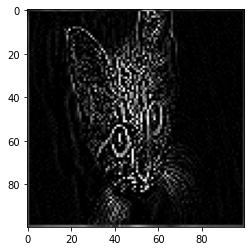

In [30]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

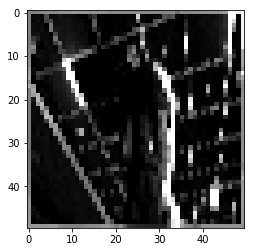

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    